# The Gender Gap in Bachelor Degrees - Data Visualisation

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website.

In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization. Let's first generate a standard matplotlib plot.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('./dataset/percent-bachelors-degrees-women-usa.csv')

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


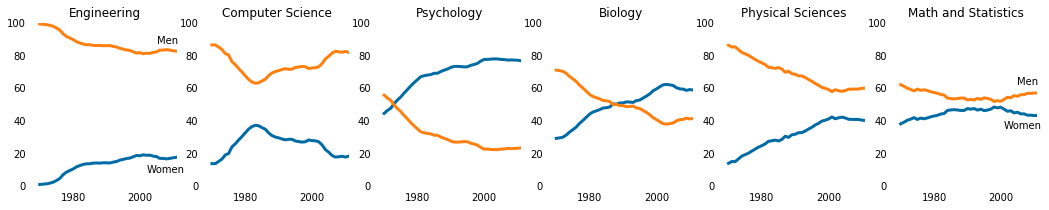

In [38]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
#     ax.spines["right"].set_visible(False)    
#     ax.spines["left"].set_visible(False)
#     ax.spines["top"].set_visible(False)    
#     ax.spines["bottom"].set_visible(False)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

## Comparing across all degree categories

In [11]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

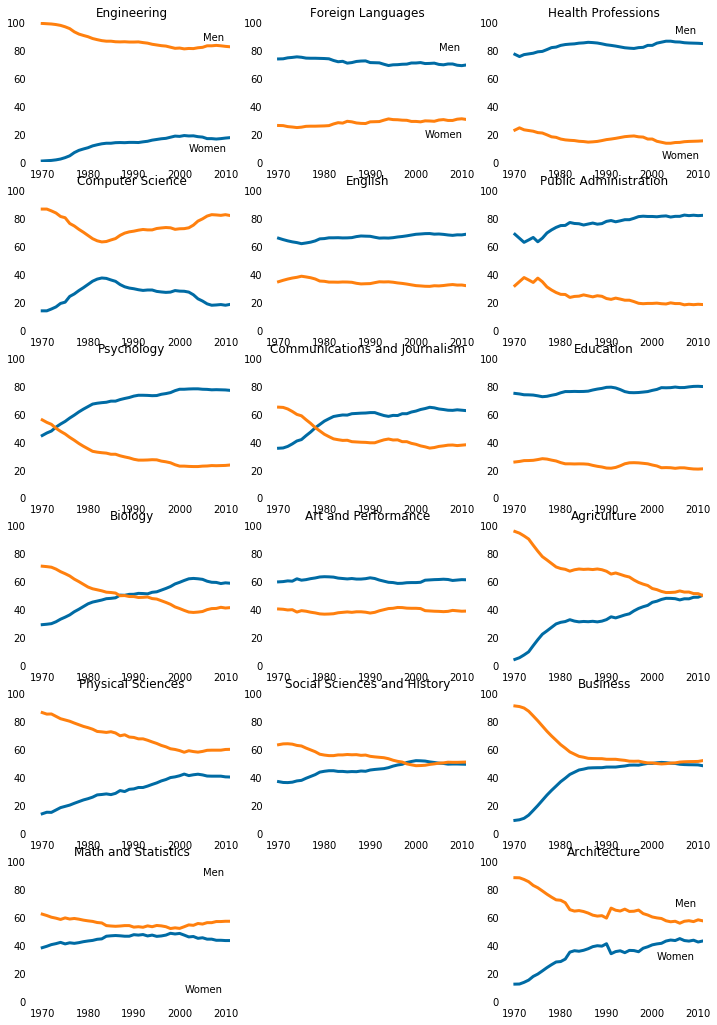

In [39]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 18))

def assign_labels(sp):
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    if sp == 1:
        ax.text(2005, 80, 'Men')
        ax.text(2002, 18, 'Women')
    if sp == 2:
        ax.text(2005, 92, 'Men')
        ax.text(2002, 3, 'Women')
    if sp == 15:
        ax.text(2005, 90, 'Men')
        ax.text(2001, 6, 'Women') 
    elif sp == 17:
        ax.text(2005, 68, 'Men')
        ax.text(2001, 30, 'Women') 

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    index_cat = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    assign_labels(sp)
        
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    index_cat = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    assign_labels(sp)
    
## Generate third column of line charts. Other degrees.
for sp in range(2,18,3):
    index_cat = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    assign_labels(sp)

plt.show()


## Hiding x-axis labels

Remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to `Axes.tick_params()` and setting labelbottom to off.

`ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')`

This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:

`ax.tick_params(labelbottom='on')`


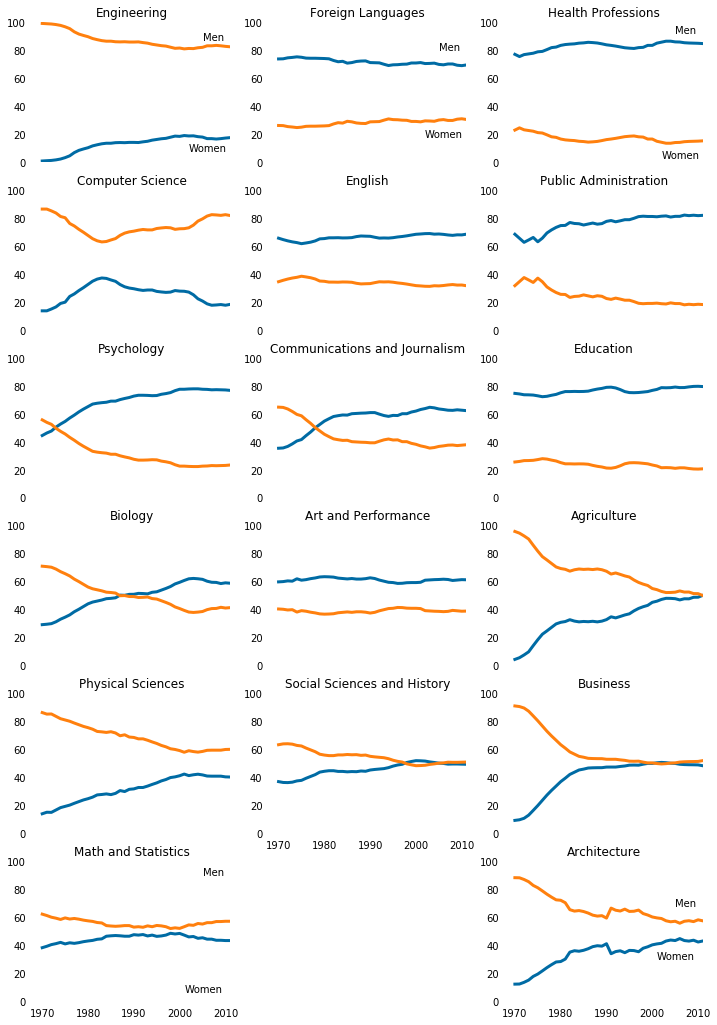

In [47]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 18))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    index_cat = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 15:
        ax.text(2005, 90, 'Men')
        ax.text(2001, 6, 'Women')
        ax.tick_params(labelbottom=True)

        
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    index_cat = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 1:
        ax.text(2005, 80, 'Men')
        ax.text(2002, 18, 'Women')
    elif sp == 13:
        ax.tick_params(labelbottom=True)
    
## Generate third column of line charts. Other degrees.
for sp in range(2,18,3):
    index_cat = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 2:
        ax.text(2005, 92, 'Men')
        ax.text(2002, 3, 'Women')
    elif sp == 17:
        ax.text(2005, 68, 'Men')
        ax.text(2001, 30, 'Women')
        ax.tick_params(labelbottom=True)
    
plt.show()

## Setting y-axis labels

We can use the `Axes.set_yticks()` method to specify which labels we want displayed. The following code enables just the 0 and 100 labels to be displayed:

`ax.set_yticks([0,100])`

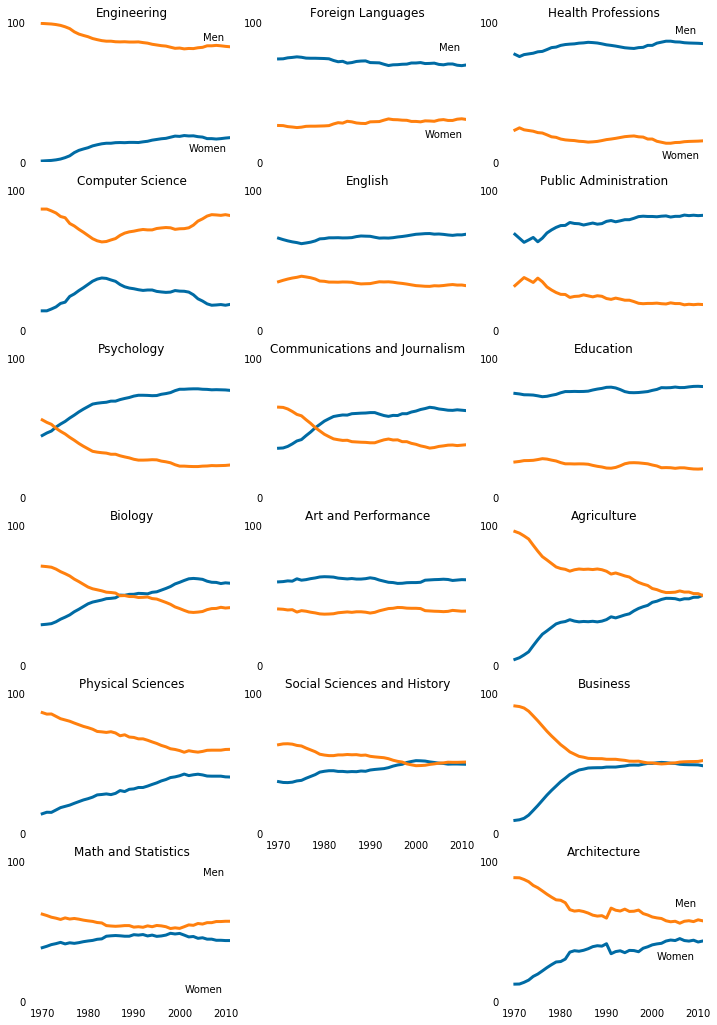

In [48]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 18))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    index_cat = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 15:
        ax.text(2005, 90, 'Men')
        ax.text(2001, 6, 'Women')
        ax.tick_params(labelbottom=True)

        
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    index_cat = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    
    if sp == 1:
        ax.text(2005, 80, 'Men')
        ax.text(2002, 18, 'Women')
    elif sp == 13:
        ax.tick_params(labelbottom=True)
    
## Generate third column of line charts. Other degrees.
for sp in range(2,18,3):
    index_cat = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    
    if sp == 2:
        ax.text(2005, 92, 'Men')
        ax.text(2002, 3, 'Women')
    elif sp == 17:
        ax.text(2005, 68, 'Men')
        ax.text(2001, 30, 'Women')
        ax.tick_params(labelbottom=True)
    
plt.show()

## Adding a horizontal line

We can generate a horizontal line across an entire subplot using the `Axes.axhline()` method. The only required parameter is the y-axis location for the start of the line:

`ax.axhline(50)`

Can change the colour of the line and increase transparancy (using `alpha` parameter, must be 0-1).

`ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)`

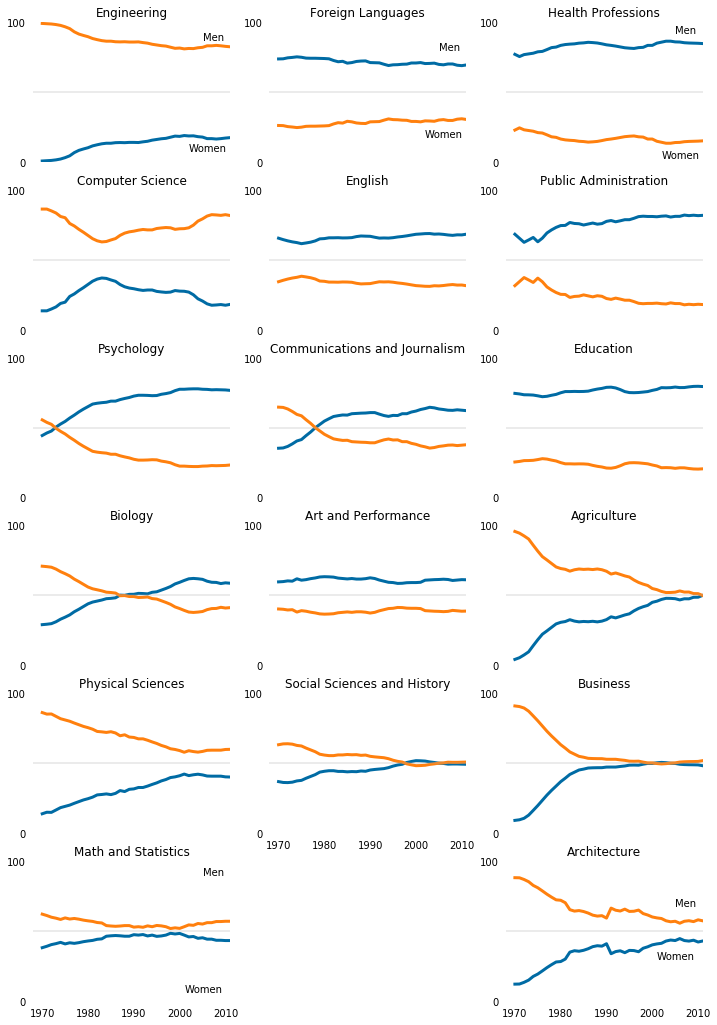

In [55]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 18))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    index_cat = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 15:
        ax.text(2005, 90, 'Men')
        ax.text(2001, 6, 'Women')
        ax.tick_params(labelbottom=True)

## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    index_cat = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 1:
        ax.text(2005, 80, 'Men')
        ax.text(2002, 18, 'Women')
    elif sp == 13:
        ax.tick_params(labelbottom=True)
    
## Generate third column of line charts. Other degrees.
for sp in range(2,18,3):
    index_cat = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index_cat]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index_cat]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index_cat])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 2:
        ax.text(2005, 92, 'Men')
        ax.text(2002, 3, 'Women')
    elif sp == 17:
        ax.text(2005, 68, 'Men')
        ax.text(2001, 30, 'Women')
        ax.tick_params(labelbottom=True)

        
## See below    
# plt.savefig('gender_degrees')     

plt.show()


## Exporting to a file

If you recall, matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or backends. If you import matplotlib and run `matplotlib.get_backend()`, you'll see the specific backend you're currently using.

With the current backend we're using, we can use `Figure.savefig()` or `pyplot.savefig()` to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using `pyplot.show()`.:

`plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.savefig('biology_degrees.png')`

In the above code, we saved a line chart as a PNG file. You can read about the different popular file types for images here. The image will be exported into the same folder that your Jupyter Notebook server is running.

Exporting plots we create using matplotlib allows us to use them in Word documents, Powerpoint presentations, and even in emails.

In [54]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'